In [1]:
from VAE import *

2025-11-21 13:23:01.240637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-21 13:23:01.241185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-21 13:23:01.273767: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-21 13:23:01.332359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 3UTQ 
- %10 Train 

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1544 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 100 train and 901 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.


2025-11-21 13:24:14.279840: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 13:24:15.045390: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 13:24:15.045482: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 13:24:15.051320: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 13:24:15.051418: I external/local_xla/xla/stream_executor

Epoch 1/300


2025-11-21 13:24:39.388552: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ba2984539e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-21 13:24:39.388830: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-11-21 13:24:39.425998: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-21 13:24:39.501083: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1763720679.624516  121609 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 9s 268ms/step - loss: 1.0525 - mean_squared_error: 0.0474 - val_loss: 1.0347 - val_mean_squared_error: 0.0764
Epoch 2/300
4/4 [==============================] - 0s 94ms/step - loss: 1.0075 - mean_squared_error: 0.0471 - val_loss: 0.9934 - val_mean_squared_error: 0.0759
Epoch 3/300
4/4 [==============================] - 0s 129ms/step - loss: 0.9637 - mean_squared_error: 0.0469 - val_loss: 0.9519 - val_mean_squared_error: 0.0754
Epoch 4/300
4/4 [==============================] - 0s 69ms/step - loss: 0.9227 - mean_squared_error: 0.0466 - val_loss: 0.9124 - val_mean_squared_error: 0.0746
Epoch 5/300
4/4 [==============================] - 0s 78ms/step - loss: 0.8822 - mean_squared_error: 0.0462 - val_loss: 0.8741 - val_mean_squared_error: 0.0739
Epoch 6/300
4/4 [==============================] - 0s 84ms/step - loss: 0.8438 - mean_squared_error: 0.0456 - val_loss: 0.8362 - val_mean_squared_error: 0.0736
Epoch 7/300
4/4 [==============================] -

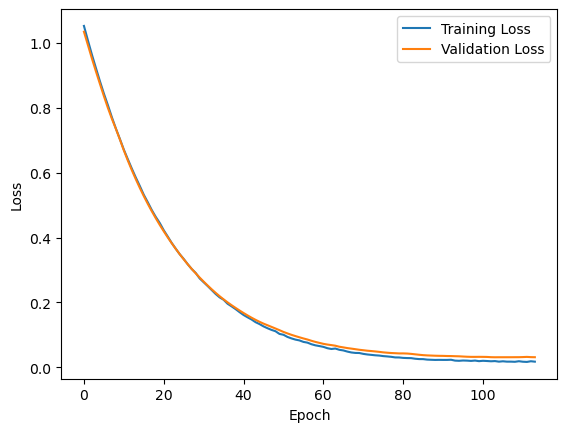

29/29 [==============================] - 0s 3ms/step


In [3]:
x_train, x_test , x_train_orig ,x_test_orig, scaler= preprocess_pipeline(
    dcd_file="proteins/3UTQ/3UTQ_replica_0.dcd",
    pdb_file="proteins/3UTQ/3UTQ.pdb",
    protein_name="3UTQ",
    train_ratio=0.1
)

history, sampling_model = model_training(32, 300, x_train, x_test)

reshaped_train, reconstruct_train, reshaped_test, reconstruct_test = reconstruct(x_train,x_test,sampling_model, scaler)



> DCD file saved: generated_files/3UTQ_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


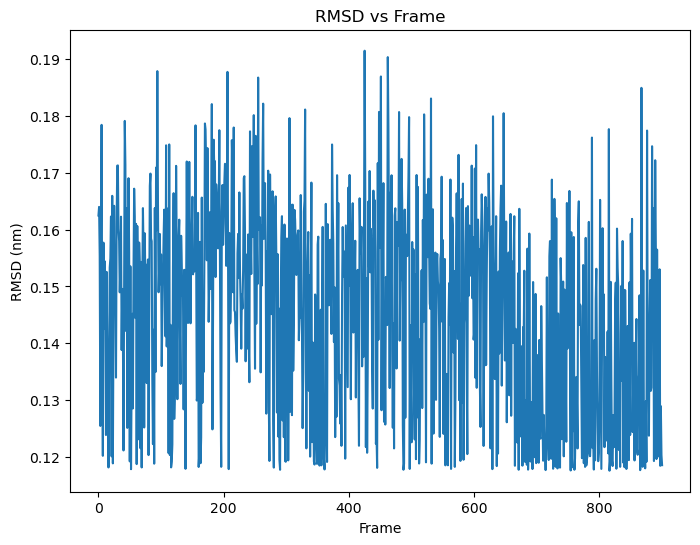

> RMSD values saved: generated_files/3UTQ_generated_rmsd.txt


In [4]:
output_path = save_selected_atoms("proteins/3UTQ/3UTQ.pdb" )
dcd_path = create_dcd_from_decoded(
    pdb_file="selected_pdb/3UTQ_selected.pdb",
    decoded_coords=reshaped_test,  # (n_frames, n_atoms, 3)
    output_prefix="3UTQ",
    output_dir="generated_files"
)


rmsd_values = compute_rmsd(
    reference_pdb=output_path,
    dcd_file=dcd_path,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/3UTQ_generated_rmsd.txt"
)

- %20 Train 

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1544 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 200 train and 801 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
7/7 [==============================] - 5s 133ms/step - loss: 1.0014 - mean_squared_error: 0.0383 - val_loss: 0.9712 - val_mean_squared_error: 0.0633
Epoch 2/300
7/7 [==============================] - 0s 54ms/step - loss: 0.9269 - mean_squared_error: 0.0379 - val_loss: 0.9041 - val_mean_squared_error: 0.0623
Epoch 3/300
7/7 [==============================] - 0s 50ms/step - loss: 0.8569 - mean_squared_error: 0.0373 - val_loss: 0.8394 - val_mean_squared_error: 0.0613
Epoch 4/300
7/7 [==============================] - 0s 41ms/step - loss: 0.7912 - mean_squared_error: 0.0363 - val_loss: 0.7766 - val

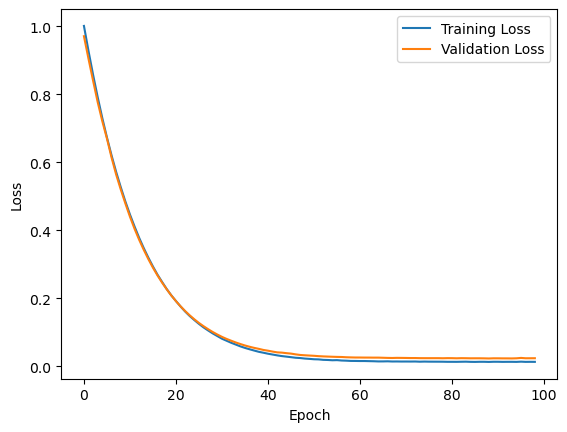

26/26 [==============================] - 0s 3ms/step


In [5]:
x_train, x_test , x_train_orig ,x_test_orig, scaler= preprocess_pipeline(
    dcd_file="proteins/3UTQ/3UTQ_replica_0.dcd",
    pdb_file="proteins/3UTQ/3UTQ.pdb",
    protein_name="3UTQ_0.2",
    train_ratio=0.2
)

history, sampling_model = model_training(32, 300, x_train, x_test)

reshaped_train, reconstruct_train, reshaped_test, reconstruct_test = reconstruct(x_train,x_test,sampling_model, scaler)



> DCD file saved: generated_files/3UTQ_0.2_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


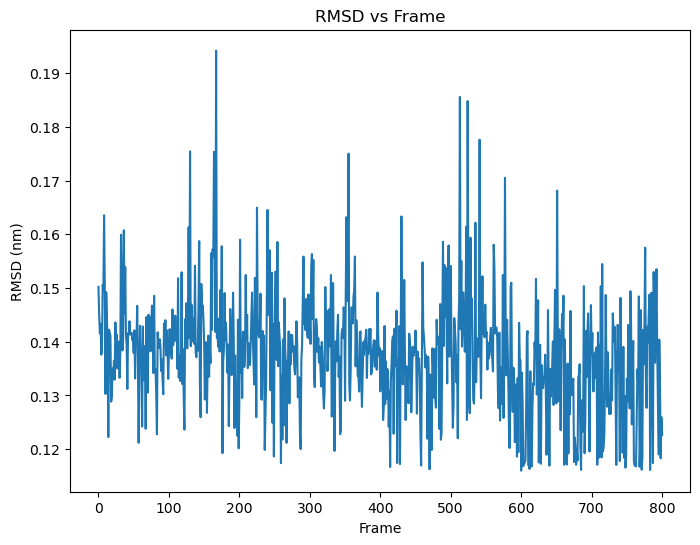

> RMSD values saved: generated_files/3UTQ_generated_rmsd_0.2.txt


In [6]:
output_path = save_selected_atoms("proteins/3UTQ/3UTQ.pdb")
dcd_path = create_dcd_from_decoded(
    pdb_file="selected_pdb/3UTQ_selected.pdb",
    decoded_coords=reshaped_test,  # (n_frames, n_atoms, 3)
    output_prefix="3UTQ_0.2",
    output_dir="generated_files"
)


rmsd_values = compute_rmsd(
    reference_pdb=output_path,
    dcd_file=dcd_path,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/3UTQ_generated_rmsd_0.2.txt"
    )

- %30 Train 

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1544 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 300 train and 701 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
10/10 [==============================] - 4s 81ms/step - loss: 0.9827 - mean_squared_error: 0.0358 - val_loss: 0.9282 - val_mean_squared_error: 0.0464
Epoch 2/300
10/10 [==============================] - 0s 44ms/step - loss: 0.8784 - mean_squared_error: 0.0352 - val_loss: 0.8293 - val_mean_squared_error: 0.0456
Epoch 3/300
10/10 [==============================] - 0s 38ms/step - loss: 0.7835 - mean_squared_error: 0.0337 - val_loss: 0.7393 - val_mean_squared_error: 0.0449
Epoch 4/300
10/10 [==============================] - 0s 34ms/step - loss: 0.6974 - mean_squared_error: 0.0324 - val_loss: 0.658

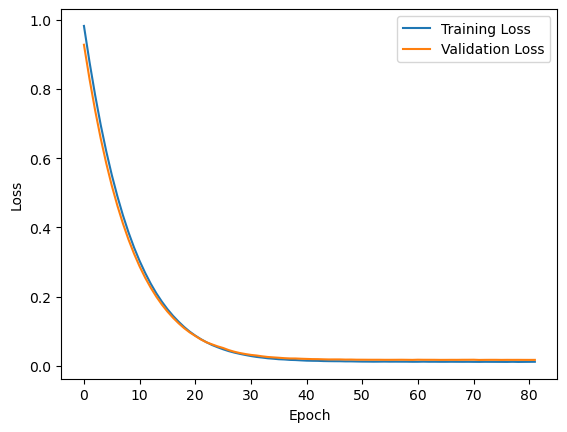

22/22 [==============================] - 0s 3ms/step


In [7]:
x_train, x_test , x_train_orig ,x_test_orig, scaler= preprocess_pipeline(
    dcd_file="proteins/3UTQ/3UTQ_replica_0.dcd",
    pdb_file="proteins/3UTQ/3UTQ.pdb",
    protein_name="3UTQ_0.3",
    train_ratio=0.3
)

history, sampling_model = model_training(32, 300, x_train, x_test)

reshaped_train, reconstruct_train, reshaped_test, reconstruct_test = reconstruct(x_train,x_test,sampling_model, scaler)



> DCD file saved: generated_files/3UTQ_0.3_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


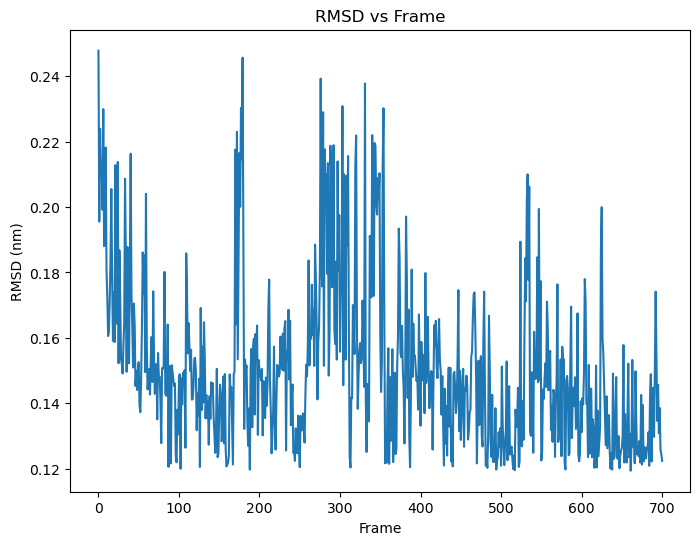

> RMSD values saved: generated_files/3UTQ_generated_rmsd_0.3.txt


In [8]:
output_path = save_selected_atoms("proteins/3UTQ/3UTQ.pdb")
dcd_path = create_dcd_from_decoded(
    pdb_file="selected_pdb/3UTQ_selected.pdb",
    decoded_coords=reshaped_test,  # (n_frames, n_atoms, 3)
    output_prefix="3UTQ_0.3",
    output_dir="generated_files"
)


rmsd_values = compute_rmsd(
    reference_pdb=output_path,
    dcd_file=dcd_path,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/3UTQ_generated_rmsd_0.3.txt"
)

- %40 Train 

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1544 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 400 train and 601 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
13/13 [==============================] - 4s 61ms/step - loss: 0.9865 - mean_squared_error: 0.0338 - val_loss: 0.9208 - val_mean_squared_error: 0.0451
Epoch 2/300
13/13 [==============================] - 0s 31ms/step - loss: 0.8532 - mean_squared_error: 0.0327 - val_loss: 0.7962 - val_mean_squared_error: 0.0442
Epoch 3/300
13/13 [==============================] - 0s 34ms/step - loss: 0.7349 - mean_squared_error: 0.0306 - val_loss: 0.6873 - val_mean_squared_error: 0.0504
Epoch 4/300
13/13 [==============================] - 0s 25ms/step - loss: 0.6324 - mean_squared_error: 0.0302 - val_loss: 0.589

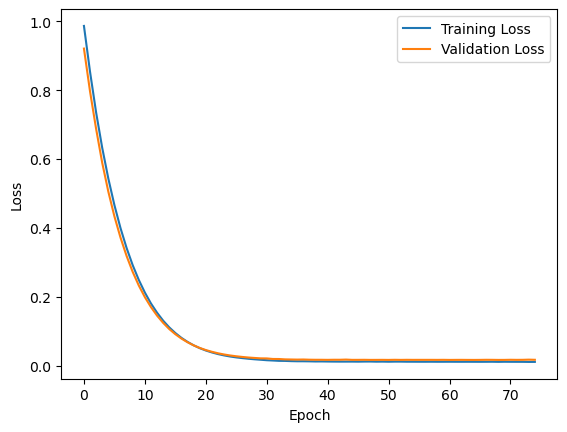

19/19 [==============================] - 0s 3ms/step


In [9]:
x_train, x_test , x_train_orig ,x_test_orig, scaler= preprocess_pipeline(
    dcd_file="proteins/3UTQ/3UTQ_replica_0.dcd",
    pdb_file="proteins/3UTQ/3UTQ.pdb",
    protein_name="3UTQ_0.4",
    train_ratio=0.4
)

history, sampling_model = model_training(32, 300, x_train, x_test)

reshaped_train, reconstruct_train, reshaped_test, reconstruct_test = reconstruct(x_train,x_test,sampling_model, scaler)



> DCD file saved: generated_files/3UTQ_0.4_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


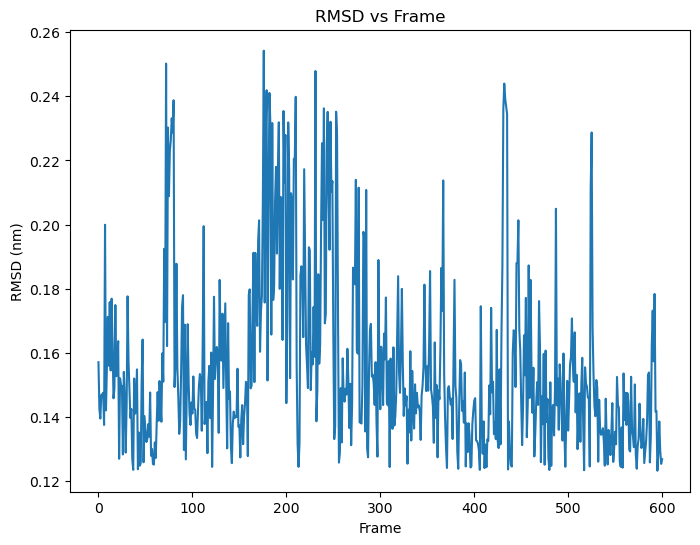

> RMSD values saved: generated_files/3UTQ_generated_rmsd_0.4.txt


In [10]:
output_path = save_selected_atoms("proteins/3UTQ/3UTQ.pdb")
dcd_path = create_dcd_from_decoded(
    pdb_file="selected_pdb/3UTQ_selected.pdb",
    decoded_coords=reshaped_test,  # (n_frames, n_atoms, 3)
    output_prefix="3UTQ_0.4",
    output_dir="generated_files"
)


rmsd_values = compute_rmsd(
    reference_pdb=output_path,
    dcd_file=dcd_path,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/3UTQ_generated_rmsd_0.4.txt"
)

- %50 Train 

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1544 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 500 train and 501 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
16/16 [==============================] - 4s 51ms/step - loss: 0.9515 - mean_squared_error: 0.0319 - val_loss: 0.8720 - val_mean_squared_error: 0.0400
Epoch 2/300
16/16 [==============================] - 0s 19ms/step - loss: 0.7937 - mean_squared_error: 0.0301 - val_loss: 0.7312 - val_mean_squared_error: 0.0470
Epoch 3/300
16/16 [==============================] - 0s 24ms/step - loss: 0.6593 - mean_squared_error: 0.0288 - val_loss: 0.6044 - val_mean_squared_error: 0.0419
Epoch 4/300
16/16 [==============================] - 0s 26ms/step - loss: 0.5465 - mean_squared_error: 0.0285 - val_loss: 0.500

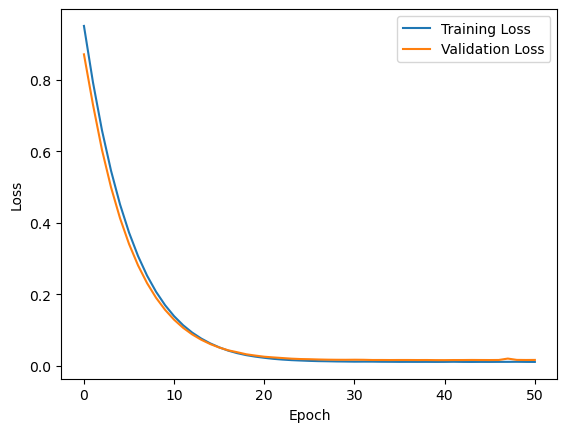

16/16 [==============================] - 0s 3ms/step


In [11]:
x_train, x_test , x_train_orig ,x_test_orig, scaler= preprocess_pipeline(
    dcd_file="proteins/3UTQ/3UTQ_replica_0.dcd",
    pdb_file="proteins/3UTQ/3UTQ.pdb",
    protein_name="3UTQ_0.5",
    train_ratio=0.5
)

history, sampling_model = model_training(32, 300, x_train, x_test)

reshaped_train, reconstruct_train, reshaped_test, reconstruct_test = reconstruct(x_train,x_test,sampling_model, scaler)


> DCD file saved: generated_files/3UTQ_0.5_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


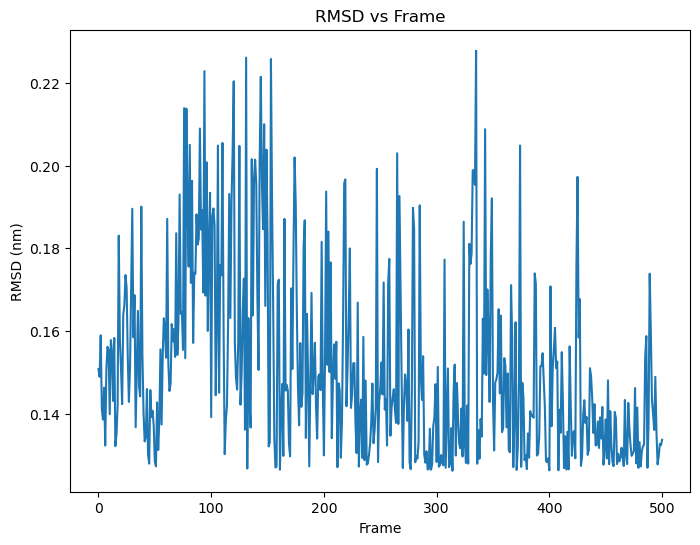

> RMSD values saved: generated_files/3UTQ_generated_rmsd_0.5.txt


In [12]:
output_path = save_selected_atoms("proteins/3UTQ/3UTQ.pdb")
dcd_path = create_dcd_from_decoded(
    pdb_file="selected_pdb/3UTQ_selected.pdb",
    decoded_coords=reshaped_test,  # (n_frames, n_atoms, 3)
    output_prefix="3UTQ_0.5",
    output_dir="generated_files"
)


rmsd_values = compute_rmsd(
    reference_pdb=output_path,
    dcd_file=dcd_path,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/3UTQ_generated_rmsd_0.5.txt"
)

# RMSD

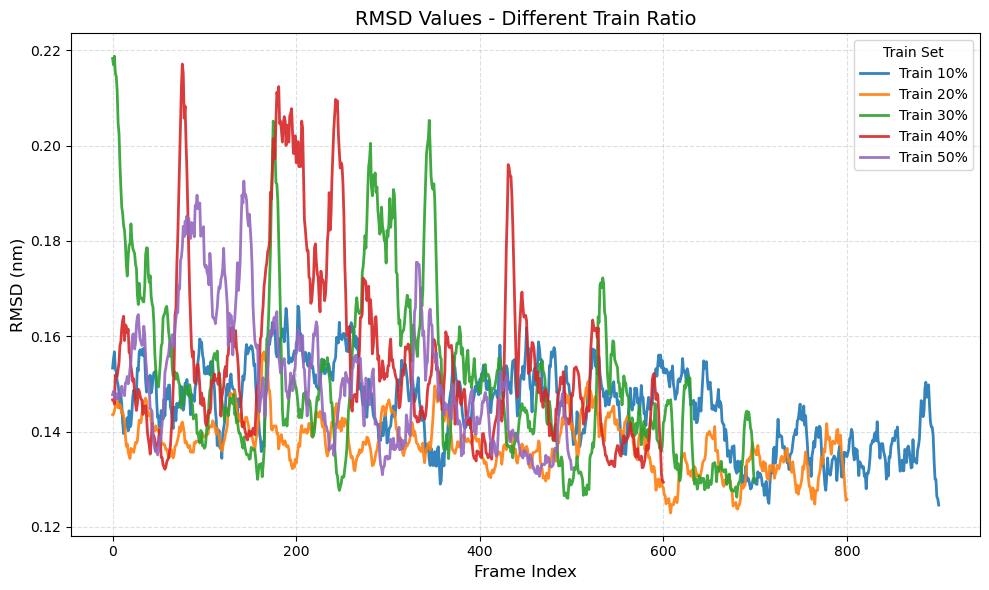

In [13]:
from scipy.ndimage import uniform_filter1d
import os
data_dir = "generated_files"

files = {
    "10%": os.path.join(data_dir, "3UTQ_generated_rmsd.txt"),
    "20%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.2.txt"),
    "30%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.3.txt"),
    "40%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.4.txt"),
    "50%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.5.txt"),
}

plt.figure(figsize=(10, 6))
window = 10  

for label, file_path in files.items():
    if os.path.exists(file_path):
        rmsd_values = np.loadtxt(file_path)
   
        smooth_rmsd = uniform_filter1d(rmsd_values, size=window)
        plt.plot(smooth_rmsd, lw=2, label=f"Train {label}", alpha=0.9)


plt.title("RMSD Values - Different Train Ratio", fontsize=14)
plt.xlabel("Frame Index", fontsize=12)
plt.ylabel("RMSD (nm)", fontsize=12)
plt.legend(title="Train Set", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


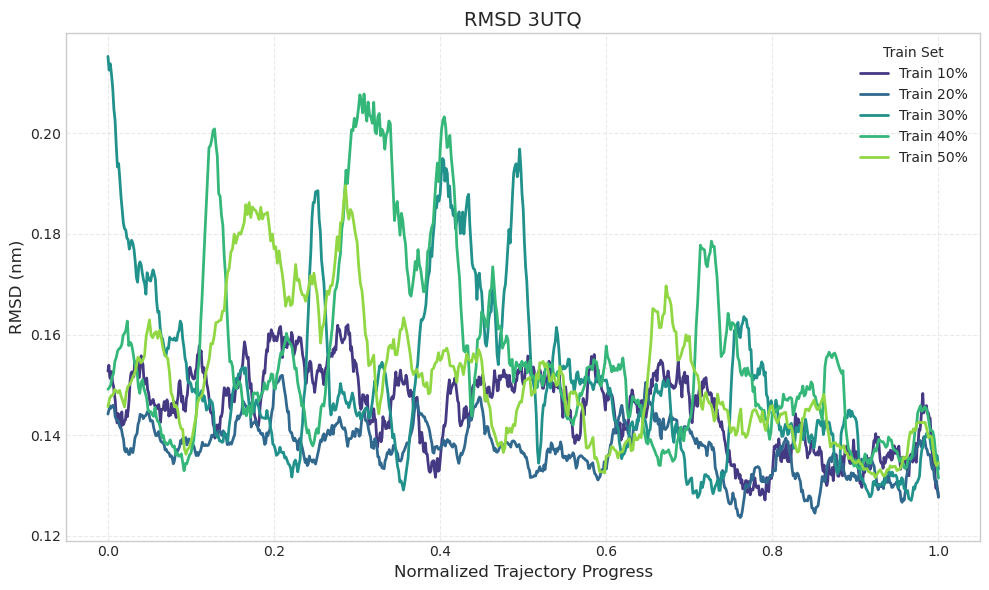

In [14]:
import seaborn as sns
import numpy as np
data_dir = "generated_files"

files = {
    "10%": os.path.join(data_dir, "3UTQ_generated_rmsd.txt"),
    "20%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.2.txt"),
    "30%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.3.txt"),
    "40%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.4.txt"),
    "50%": os.path.join(data_dir, "3UTQ_generated_rmsd_0.5.txt"),
}

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", n_colors=len(files))
window = 15 

for i, (label, file_path) in enumerate(files.items()):
    if os.path.exists(file_path):
        rmsd = np.loadtxt(file_path)
    
        smooth = uniform_filter1d(rmsd, size=window)

        x = np.linspace(0, 1, len(smooth))

        plt.plot(x, smooth, lw=2, color=colors[i], label=f"Train {label}")

plt.title("RMSD 3UTQ", fontsize=14)
plt.xlabel("Normalized Trajectory Progress", fontsize=12)
plt.ylabel("RMSD (nm)", fontsize=12)
plt.legend(title="Train Set", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [15]:
import mdtraj as md
import matplotlib.pyplot as plt
def compute_rmsd_per_frame(pdb_file,
                           dcd_file,
                           atom_selection="name N or name CA or name C or name O", 
                           align=True,
                           ref_frame=0,
                           plot=True):
 

    traj = md.load_dcd(dcd_file, top=pdb_file)   
    atom_indices = traj.topology.select(atom_selection)
    ref = traj[ref_frame]

  
    if align:
        traj_super = traj.superpose(ref, atom_indices=atom_indices)
    else:
        traj_super = traj

   
    rmsd_vals_nm = md.rmsd(traj_super, ref, atom_indices=atom_indices)

  
    if plot:
        plt.figure(figsize=(8,3.5))
        plt.plot(rmsd_vals_nm , lw=1.5)  
        plt.xlabel("Frame")
        plt.ylabel("RMSD(nm)")
        plt.title("RMSD 3UTQ MD Simulation")


dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


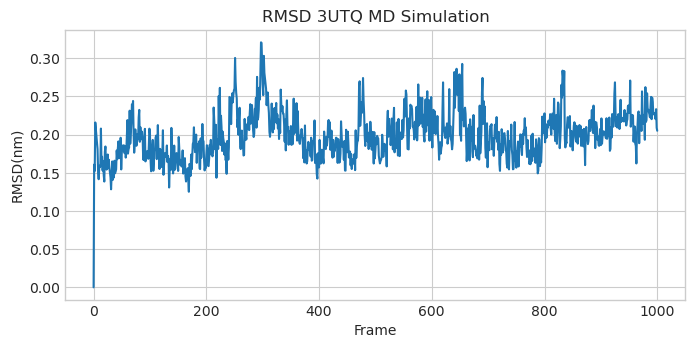

In [16]:
dcd_file="proteins/3UTQ/3UTQ_replica_0.dcd"
pdb_file="proteins/3UTQ/3UTQ.pdb"

compute_rmsd_per_frame(pdb_file,
                           dcd_file,
                           atom_selection="name N or name CA or name C or name O", 
                           align=True,
                           ref_frame=0,
                           plot=True)

# BOX Plot

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
Total Frames: 1001
10% 100 frame -> subset_dcds/10percent_3UTQ_replica_0.dcd
20% 200 frame -> subset_dcds/20percent_3UTQ_replica_0.dcd
30% 300 frame -> subset_dcds/30percent_3UTQ_replica_0.dcd
40% 400 frame -> subset_dcds/40percent_3UTQ_replica_0.dcd
50% 500 frame -> subset_dcds/50percent_3UTQ_replica_0.dcd
All Frames Generated.
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD

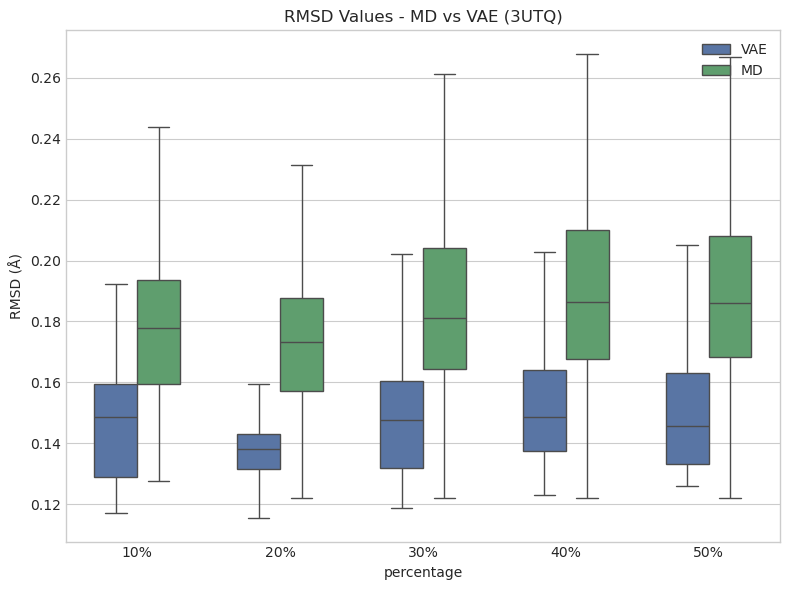

In [17]:
import seaborn as sns
import numpy as np 
import pandas as pd
def split_dcd_by_percentage(dcd_file, pdb_file, output_dir="subset_dcds", percentages=[10, 20, 30, 40, 50]):

    os.makedirs(output_dir, exist_ok=True)


    traj = md.load_dcd(dcd_file, top=pdb_file)
    total_frames = traj.n_frames
    print(f"Total Frames: {total_frames}")

    for p in percentages:
        subset_frames = int(total_frames * (p / 100.0))
        subset_traj = traj[:subset_frames]  
        output_path = os.path.join(output_dir, f"{p}percent_{os.path.basename(dcd_file)}")
        subset_traj.save_dcd(output_path)
        print(f"{p}% {subset_frames} frame -> {output_path}")

    print("All Frames Generated.")


dcd_file="proteins/3UTQ/3UTQ_replica_0.dcd"
pdb_file="proteins/3UTQ/3UTQ.pdb"

split_dcd_by_percentage(dcd_file, pdb_file)

def rmsd_distribution_for_files(pdb_file, dcd_files, atom_selection="name CA"):
    ref = md.load_pdb(pdb_file)
    atom_indices = ref.topology.select(atom_selection)
    ref = ref.atom_slice(atom_indices)

    rmsd_dict = {}
    for f in dcd_files:
        traj = md.load_dcd(f, top=pdb_file)
        traj = traj.atom_slice(atom_indices)
        rmsd = md.rmsd(traj, ref)
        rmsd_dict[os.path.basename(f)] = rmsd
    return rmsd_dict


pdb_file = "selected_pdbs/3UTQ_selected.pdb"

vae_files = {
    "10%": "generated_files/3UTQ_generated.dcd",
    "20%": "generated_files/3UTQ_0.2_generated.dcd",
    "30%": "generated_files/3UTQ_0.3_generated.dcd",
    "40%": "generated_files/3UTQ_0.4_generated.dcd",
    "50%": "generated_files/3UTQ_0.5_generated.dcd",
}
pdb = "proteins/3UTQ/3UTQ.pdb"
md_files = {
    "10%": "subset_dcds/10percent_3UTQ_replica_0.dcd",
    "20%": "subset_dcds/20percent_3UTQ_replica_0.dcd",
    "30%": "subset_dcds/30percent_3UTQ_replica_0.dcd",
    "40%": "subset_dcds/40percent_3UTQ_replica_0.dcd",
    "50%": "subset_dcds/50percent_3UTQ_replica_0.dcd",
}



vae_rmsd = rmsd_distribution_for_files(pdb_file, list(vae_files.values()), atom_selection="name CA")
md_rmsd  = rmsd_distribution_for_files(pdb, list(md_files.values()),  atom_selection="name CA")


df_list = []

for label, path in vae_files.items():
    fname = os.path.basename(path)
    rmsd = vae_rmsd[fname]
    df_list.append(pd.DataFrame({"percentage": label, "rmsd": rmsd, "source": "VAE"}))

for label, path in md_files.items():
    fname = os.path.basename(path)
    rmsd = md_rmsd[fname]
    df_list.append(pd.DataFrame({"percentage": label, "rmsd": rmsd, "source": "MD"}))

df = pd.concat(df_list, ignore_index=True)

# --- BOX-Plot ---
plt.figure(figsize=(8,6))
sns.boxplot(x="percentage", y="rmsd", hue="source", data=df,showfliers=False,
            palette=["#4C72B0", "#55A868"], width=0.6)


plt.ylabel("RMSD (Å)")
plt.title("RMSD Values - MD vs VAE (3UTQ)")
plt.legend(title="", loc="upper right")
plt.tight_layout()
plt.show()


# RMSF

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


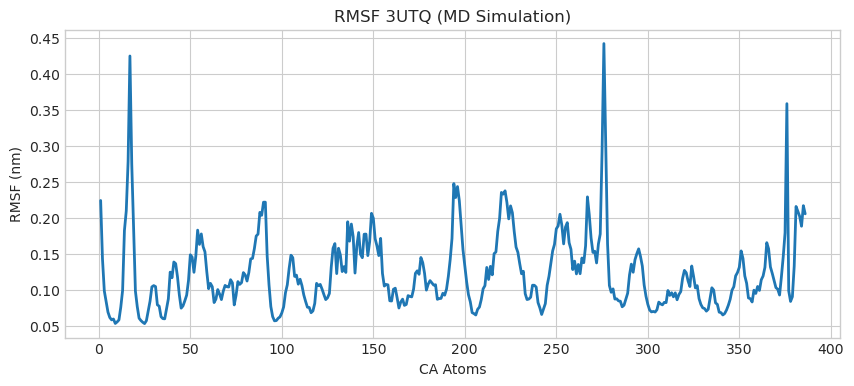

In [18]:
traj = md.load_dcd("proteins/3UTQ/3UTQ_replica_0.dcd", top="proteins/3UTQ/3UTQ.pdb")
atoms = traj.topology.select('name CA')  
traj_atom = traj.atom_slice(atoms)

ref = md.load_pdb("proteins/3UTQ/3UTQ.pdb").atom_slice(atoms)
traj_atom.superpose(ref)


positions = traj_atom.xyz 
avg_positions = positions.mean(axis=0)
rmsf = np.sqrt(((positions - avg_positions)**2).sum(axis=2).mean(axis=0))

plt.figure(figsize=(10,4))
plt.plot(range(1, len(rmsf)+1), rmsf, lw=2)
plt.xlabel('CA Atoms')
plt.ylabel('RMSF (nm)')
plt.title('RMSF 3UTQ (MD Simulation)')
plt.grid(True)
plt.show()

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


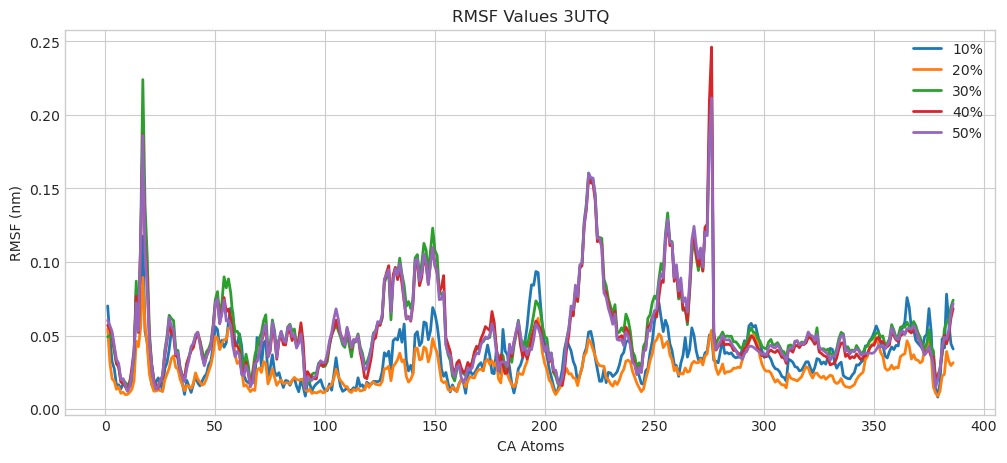

In [19]:
data_dir = "generated_files"

models = {
    "10%": ("3UTQ_selected.pdb", "3UTQ_generated.dcd"),
    "20%": ("3UTQ_selected.pdb", "3UTQ_0.2_generated.dcd"),
    "30%": ("3UTQ_selected.pdb", "3UTQ_0.3_generated.dcd"),
    "40%": ("3UTQ_selected.pdb", "3UTQ_0.4_generated.dcd"),
    "50%": ("3UTQ_selected.pdb", "3UTQ_0.5_generated.dcd")
}

plt.figure(figsize=(12,5))
pdb_file = "selected_pdb/3UTQ_selected.pdb"
for label, (pdb_file, dcd_file) in models.items():
    pdb_path = os.path.join("selected_pdb", pdb_file)
    dcd_path = os.path.join(data_dir, dcd_file)
    
    traj = md.load_dcd(dcd_path, top=pdb_path)
    atoms = traj.topology.select('name CA')
    traj_atom = traj.atom_slice(atoms)
  
    ref = md.load_pdb(pdb_path).atom_slice(atoms)
    traj_atom.superpose(ref)

    positions = traj_atom.xyz
    avg_positions = positions.mean(axis=0)
    rmsf = np.sqrt(((positions - avg_positions)**2).sum(axis=2).mean(axis=0))
    

    plt.plot(range(1, len(rmsf)+1), rmsf, lw=2, label=label)

plt.xlabel("CA Atoms")
plt.ylabel("RMSF (nm)")
plt.title("RMSF Values 3UTQ")
plt.legend()
plt.grid(True)
plt.show()